# Baseline Simple Count

In [59]:
b1=df[df.subreddit.isin(['Bitcoin','btc'])]
b2=df[df.clean_text.str.contains('|'.join(['btc','bitcoin']),case=False)]
b=pd.concat([b1,b2])

<AxesSubplot:xlabel='created'>

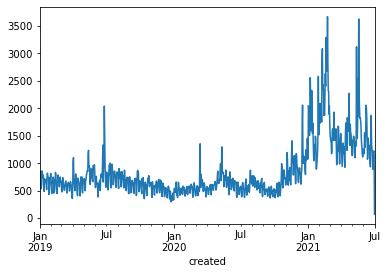

In [60]:
b.resample('d').id.count().plot()
#b1.resample('d').id.count().plot()
#b2.resample('d').id.count().plot()

## Buy Sell BaseLine

In [77]:
b.loc[b.clean_text.str.contains('sell'),'sell']=True
b.loc[b.clean_text.str.contains('buy'),'buy']=True
b.sell=b.sell.fillna(0)
b.buy=b.buy.fillna(0)
b['volume']=1

C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



<AxesSubplot:xlabel='created'>

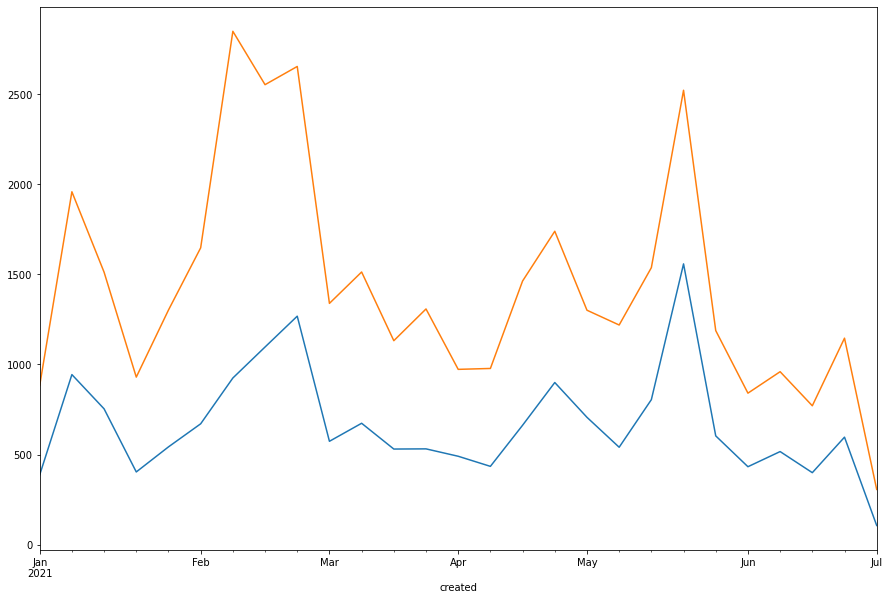

In [121]:
b['2021':].sell.resample('w').sum().plot(figsize=(15,10))
b['2021':].buy.resample('w').sum().plot()

<AxesSubplot:xlabel='created'>

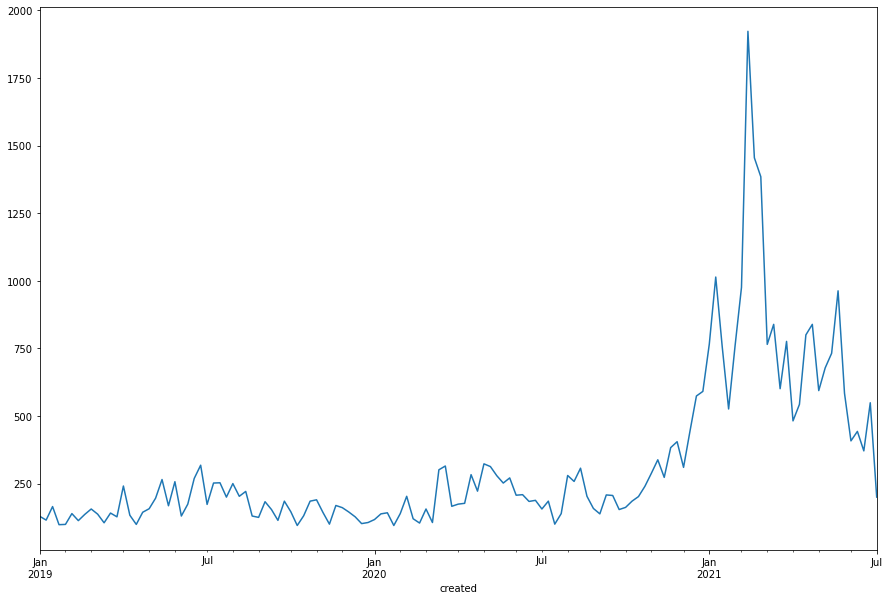

In [120]:
(b.buy-b.sell).resample('w').sum().plot(figsize=(15,10))

In [82]:
import sys
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
#connect local PATH
p = os.path.abspath(r'C:\Users\Ben\Desktop\Diplomatiki')
sys.path.append(str(p))
from CryptoSent.tools.crypto_coin_actual import get_btc_actual_hourly
from CryptoSent.tools import evaluation as eval
btc=get_btc_actual_hourly()

100%|██████████| 30907/30907 [00:00<00:00, 132085.25it/s]


Volume


C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Buy


C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Sell


C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Buy-Sell


C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Volume
Buy
Sell
Buy-Sell


<AxesSubplot:>

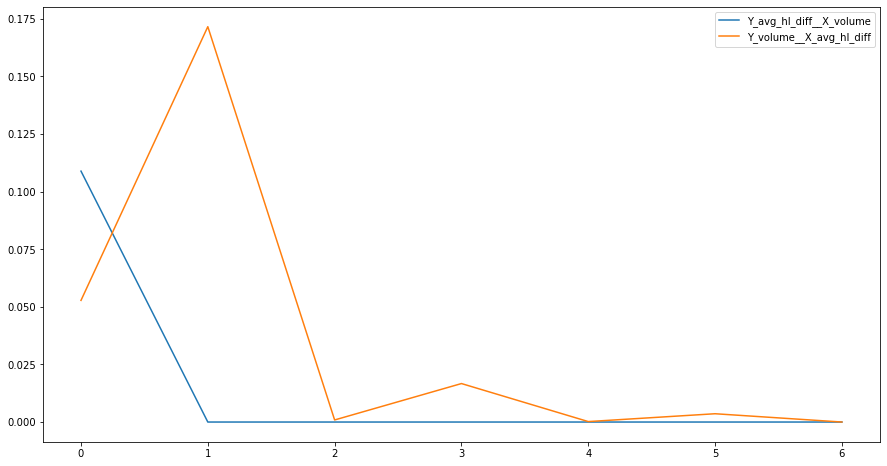

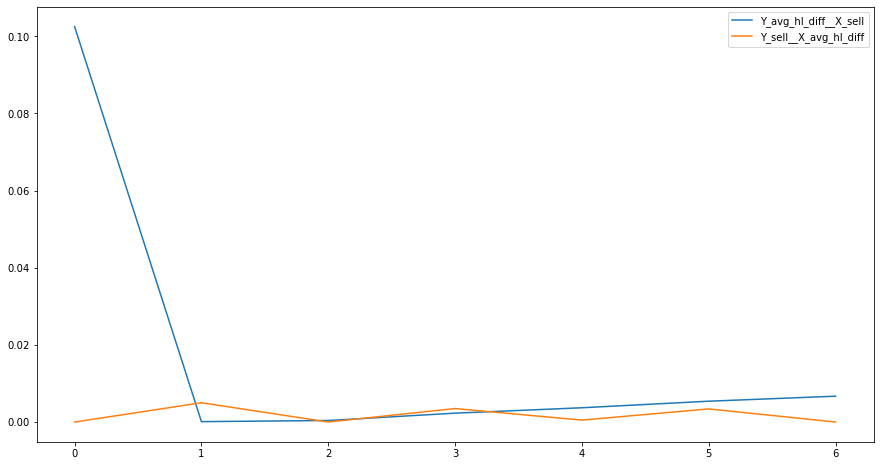

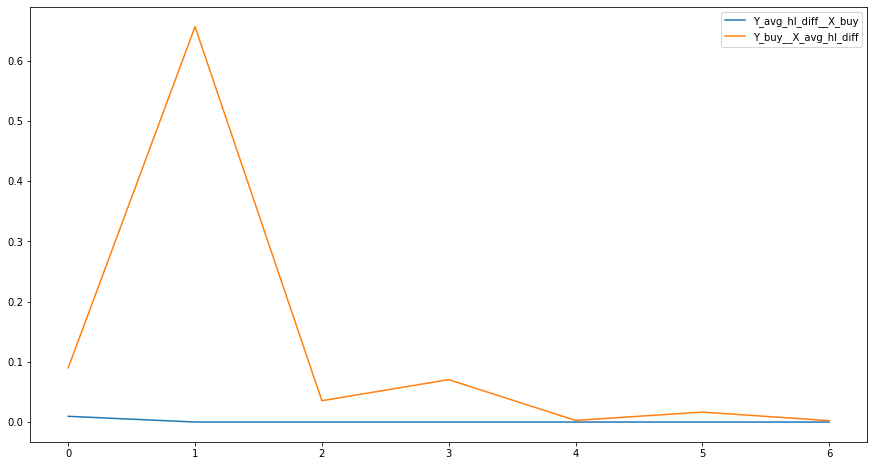

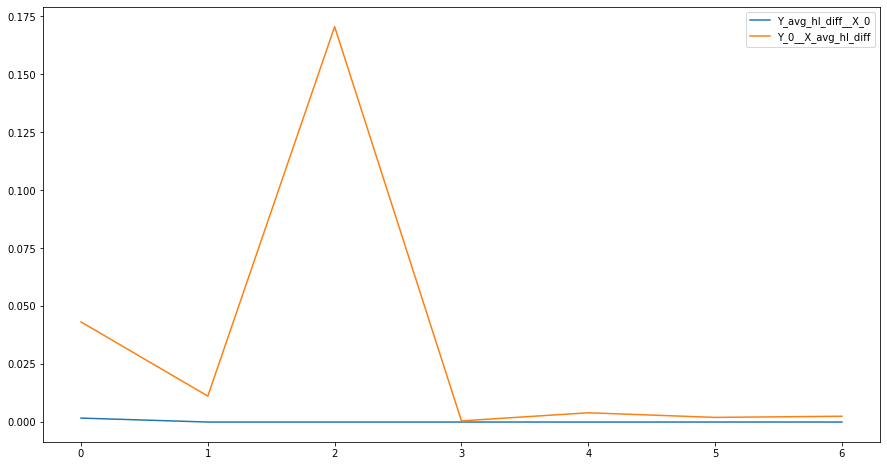

In [131]:
print('Volume')
eval.get_ts_2axis((b['2021':].volume),btc.avg_oc,resample_period='d',btc_transformation='diff')
print('Buy')
eval.get_ts_2axis((b['2021':].buy),btc.avg_oc,resample_period='d',btc_transformation='diff')
print('Sell')
eval.get_ts_2axis((b['2021':].sell),btc.avg_oc,resample_period='d',btc_transformation='diff')
print('Buy-Sell')
eval.get_ts_2axis((b['2021':].buy-b['2021':].sell),btc.avg_oc,resample_period='d',btc_transformation='diff')
#--------------Granger Causality-------------#
print('Volume')
inm=eval.result_processing((b.volume),btc.avg_hl,resample_period='d')[['volume','avg_hl_diff']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))
print('Buy')
inm=eval.result_processing((b.sell),btc.avg_hl,resample_period='d')[['sell','avg_hl_diff']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))
print('Sell')
inm=eval.result_processing((b.buy),btc.avg_hl,resample_period='d')[['buy','avg_hl_diff']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))
print('Buy-Sell')
inm=eval.result_processing((b.buy-b.sell),btc.avg_hl,resample_period='d')[[0,'avg_hl_diff']].dropna()
eval.get_granger_causality(inm,maxlag=7).plot(figsize=(15,8))